In [2]:
import os
import matplotlib.pyplot as plt
import json
import torchmetrics
import torch
import numpy as np

import sys, os

from src.datasets.cub200 import TestDataset as CUB200TestDataset
from src.datasets.cars196 import TestDataset as Cars196TestDataset
from src.datasets.fashionmnist import TestDataset as FashionMNISTTestDataset
from src.datasets.mnist import TestDataset as MNISTTestDataset

In [3]:
dataset = "cub200"
basepath = f"lightning_logs/{dataset}"

models = ["deterministic", "pfe", "laplace_posthoc_fix", "laplace_posthoc_pos", "laplace_posthoc_full",
                "laplace_online_fix", "laplace_online_pos", "laplace_online_full",
                "laplace_posthoc_arccos_pos", "laplace_posthoc_arccos_full",
                "laplace_online_arccos_pos", "laplace_online_arccos_full"]

all_data = {}
for model in models:

    all_data[model] = {}
    for seed in range(1, 6):
        if "laplace_online" in model:
            if "arccos" in model:
                path = os.path.join(basepath, "laplace_online", str(seed), "arccos", model.split("_")[-1])
            else:
                path = os.path.join(basepath, "laplace_online", str(seed), "contrastive", model.split("_")[-1])
        elif "laplace_posthoc" in model:
            if "arccos" in model:
                path = os.path.join(basepath, "laplace_posthoc", str(seed), "arccos", model.split("_")[-1])
            else:
                path = os.path.join(basepath, "laplace_posthoc", str(seed), "contrastive", model.split("_")[-1])
        else:
            path = os.path.join(basepath, model, str(seed))

        path = os.path.join(path, "results/figure_data/test_ood_curves.json")

        if not os.path.isfile(path):
            print(f"missing => {model} with seed {seed}")
            continue

        with open(path, 'r') as f:
            data = json.load(f)

        for key in data:
            if key in all_data[model]: 
                all_data[model][key] += [data[key]]
            else:
                all_data[model][key] = [data[key]]

missing => deterministic with seed 1
missing => deterministic with seed 2
missing => deterministic with seed 3
missing => deterministic with seed 4
missing => deterministic with seed 5
missing => laplace_online_pos with seed 1
missing => laplace_online_pos with seed 2
missing => laplace_online_pos with seed 3
missing => laplace_online_pos with seed 4
missing => laplace_online_pos with seed 5
missing => laplace_online_full with seed 3
missing => laplace_online_full with seed 4
missing => laplace_online_full with seed 5
missing => laplace_posthoc_arccos_pos with seed 1
missing => laplace_posthoc_arccos_pos with seed 2
missing => laplace_posthoc_arccos_pos with seed 3
missing => laplace_posthoc_arccos_pos with seed 4
missing => laplace_posthoc_arccos_pos with seed 5
missing => laplace_posthoc_arccos_full with seed 1
missing => laplace_posthoc_arccos_full with seed 2
missing => laplace_posthoc_arccos_full with seed 3
missing => laplace_posthoc_arccos_full with seed 4
missing => laplace_pos

In [4]:
data_dir = "/home/warburg/data"
if dataset == "cub200":
    dataset_id = CUB200TestDataset(data_dir)
    dataset_ood = Cars196TestDataset(data_dir)
elif dataset == "fashionmnist":
    dataset_id = FashionMNISTTestDataset(data_dir)
    dataset_ood = MNISTTestDataset(data_dir)

==> low uncertainty


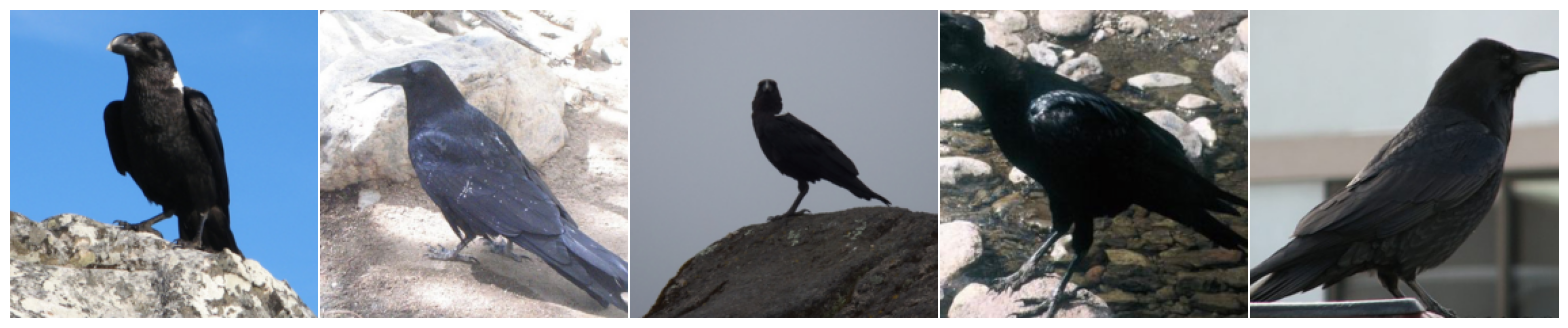

==> high uncertainty


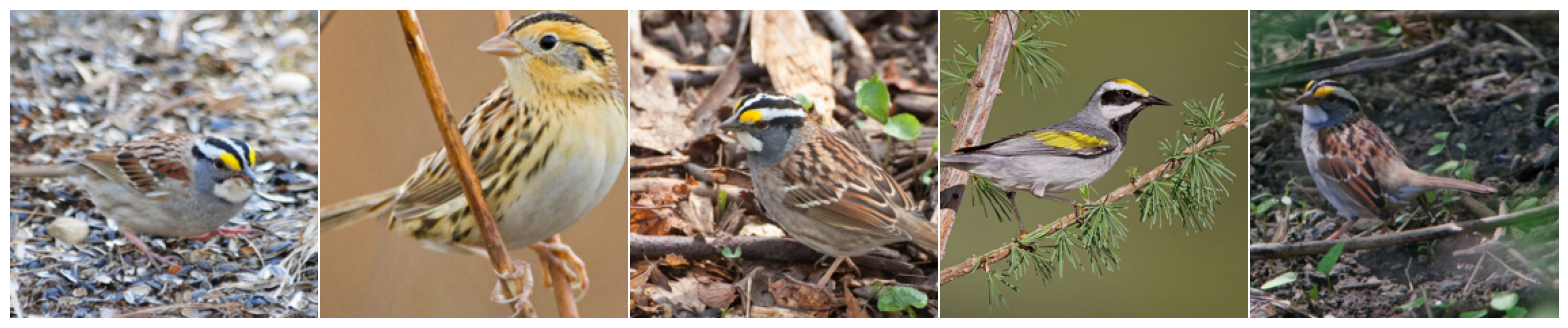

==> low uncertainty


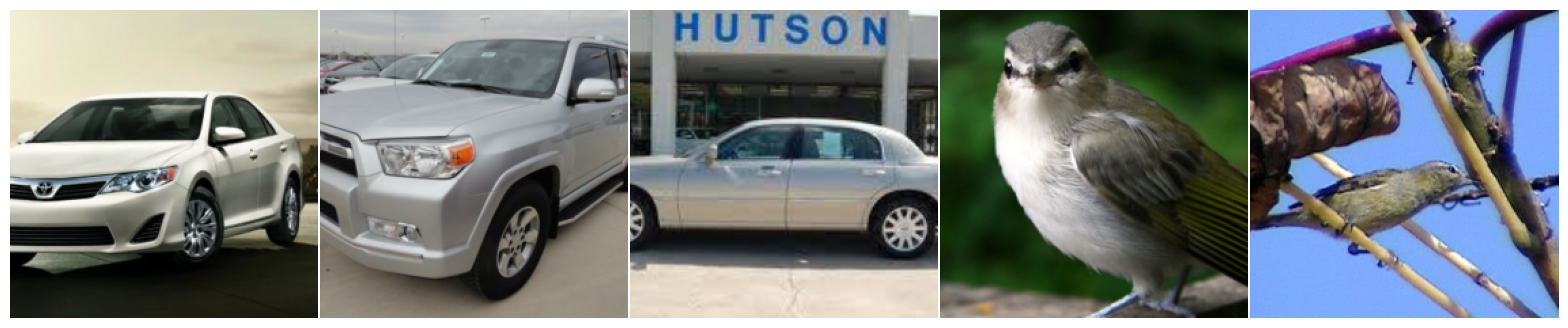

==> high uncertainty


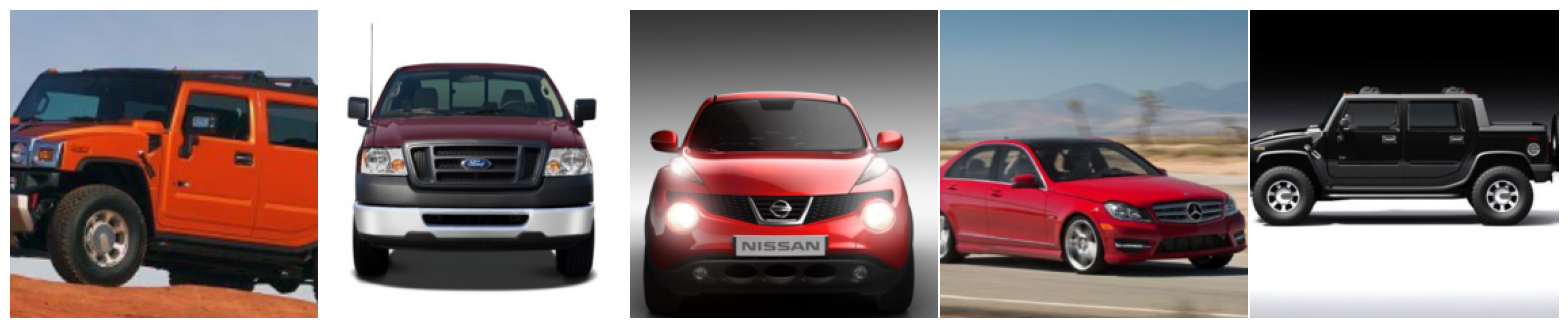

==> low uncertainty


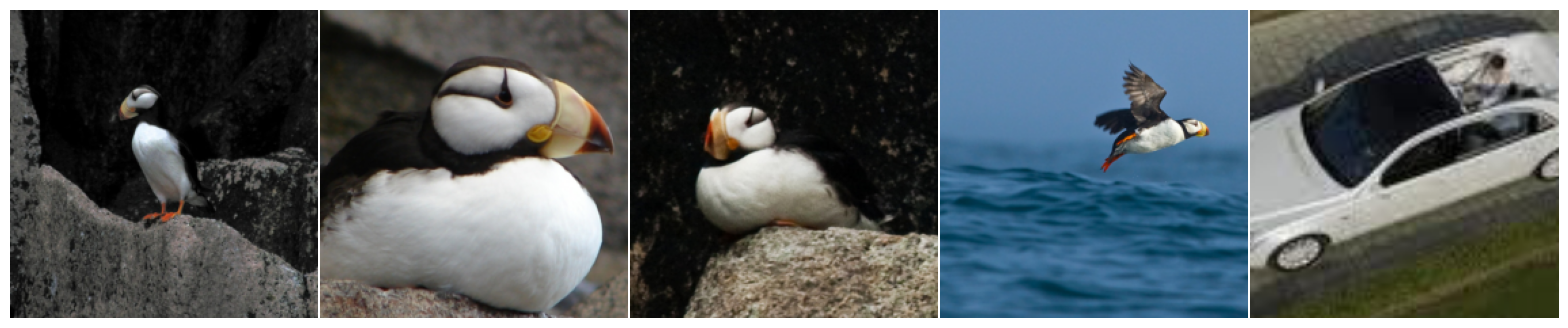

==> high uncertainty


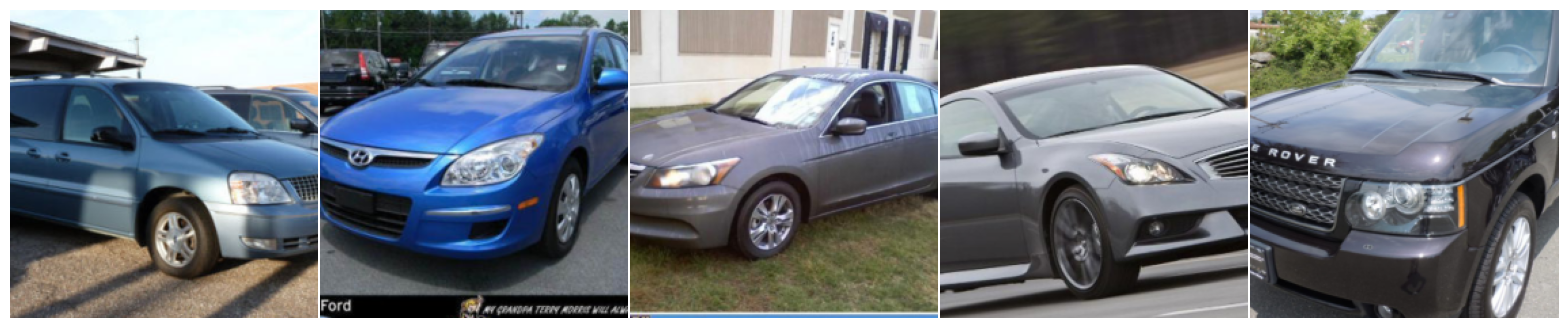

In [5]:
for model in ["pfe", "laplace_posthoc_full", "laplace_online_full"]:
    if "pred" not in all_data[model]:
        continue
    pred = all_data[model]["pred"][0]
    target = np.array(all_data[model]["target"][0])

    assert len(pred) == len(dataset_id) + len(dataset_ood)

    print("==> low uncertainty")
    argsort_pred = np.argsort(pred)
    assert pred[argsort_pred[0]] == np.min(pred)
    # init subplot
    fig, ax = plt.subplots(1, 5, figsize=(20, 4))
    for i in range(5):
        idx = argsort_pred[i]
        if idx < len(dataset_id):
            #print(f"ID: {model} {idx}")
            im = dataset_id.__getitem__(idx)[0]
        else:
            #print(f"OOD: {model} {idx}")
            im = dataset_ood.__getitem__(idx - len(dataset_id))[0]
        
        # unnormalize
        if dataset == "cub200":
            im = im * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1) + torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
        ax[i].imshow(im.permute(1, 2, 0))
        ax[i].axis('off')
        plt.subplots_adjust(wspace=0, hspace=0)

    plt.show()
    
    print("==> high uncertainty")
    argsort_pred = np.argsort(pred)[::-1]
    assert pred[argsort_pred[0]] == np.max(pred)
    # init subplot
    fig, ax = plt.subplots(1, 5, figsize=(20, 4))
    for i in range(5):
        idx = argsort_pred[i]
        if idx < len(dataset_id):
            #print(f"ID: {model} {idx}")
            im = dataset_id.__getitem__(idx)[0]
        else:
            #print(f"OOD: {model} {idx}")
            im = dataset_ood.__getitem__(idx - len(dataset_id))[0]
        
        # unnormalize
        if dataset == "cub200":
            im = im * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1) + torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
        ax[i].imshow(im.permute(1, 2, 0))
        ax[i].axis('off')
        plt.subplots_adjust(wspace=0, hspace=0)

    plt.show()

